Actividad Autónoma 2 – Programación II (Vehículos Autónomos)

Brayan Cardenas 


Instrucciones:  

Escenario: Sistema de Control de Vehículos Autónomos 

Una empresa de tecnología requiere un software que gestione una flota

de vehículos autónomos de diferentes tipos: 
•Automóviles 
•Camiones 
•Motocicletas 

Todos los vehículos comparten ciertas características básicas 

(abstracción): 

• Identificador único 
• Modelo 
• Velocidad máxima 
• Capacidad de carga 

Además, cada tipo de vehículo tiene comportamientos específicos 

(herencia y polimorfismo), por ejemplo: 

• El camión puede engranar remolques. 

• La motocicleta puede realizar maniobras evasivas rápidas.

In [1]:
from abc import ABC, abstractmethod

In [2]:
class EstrategiaConduccion(ABC):
    @abstractmethod
    def conducir(self):
        pass

class ConduccionDeportiva(EstrategiaConduccion):
    def conducir(self):
        print("Modo de conducción deportiva activado")

class ConduccionOffRoad(EstrategiaConduccion):
    def conducir(self):
        print("Modo de conducción off-road activado")

class EstrategiaEmergencia(EstrategiaConduccion):
    def conducir(self):
        print("Modo de conducción de emergencia activado")



In [3]:
#  Decorator Pattern 
class VehiculoDecorator:
    def __init__(self, vehiculo):
        self._vehiculo = vehiculo

    def get_identificador(self):
        return self._vehiculo.get_identificador()

    def get_modelo(self):
        return self._vehiculo.get_modelo()

    def get_velocidad_maxima(self):
        return self._vehiculo.get_velocidad_maxima()

    def get_capacidad_carga(self):
        return self._vehiculo.get_capacidad_carga()

    def acelerar(self):
        self._vehiculo.acelerar()

    def frenar(self):
        self._vehiculo.frenar()

    def informar_estado(self):
        self._vehiculo.informar_estado()

class PilotoAutomaticoDecorator(VehiculoDecorator):
    def informar_estado(self):
        self._vehiculo.informar_estado()
        print("Piloto automático activado")

class AsistenteEstacionamientoDecorator(VehiculoDecorator):
    def informar_estado(self):
        self._vehiculo.informar_estado()
        print("Asistente de estacionamiento activado")



In [4]:
# Singleton Pattern
class ControlDeFlota:
    _instance = None
    _vehiculos = []

    def __new__(cls):
        if cls._instance is None:
            cls._instance = super().__new__(cls)
        return cls._instance

    def agregar_vehiculo(self, vehiculo):
        if vehiculo not in self._vehiculos:
            self._vehiculos.append(vehiculo)

    def listar_vehiculos(self):
        for vehiculo in self._vehiculos:
            vehiculo.informar_estado()



In [5]:
# Clase Abstracta Vehículo 
class Vehiculo(ABC):
    def __init__(self, identificador, modelo, velocidad_maxima, capacidad_carga):
        self.__identificador = identificador
        self.__modelo = modelo
        self.__velocidad_maxima = velocidad_maxima
        self.__capacidad_carga = capacidad_carga
        self.estrategia_conduccion = None

    # Getters y Setters
    def get_identificador(self):
        return self.__identificador

    def set_identificador(self, identificador):
        self.__identificador = identificador

    def get_modelo(self):
        return self.__modelo

    def set_modelo(self, modelo):
        self.__modelo = modelo

    def get_velocidad_maxima(self):
        return self.__velocidad_maxima

    def set_velocidad_maxima(self, velocidad_maxima):
        self.__velocidad_maxima = velocidad_maxima

    def get_capacidad_carga(self):
        return self.__capacidad_carga

    def set_capacidad_carga(self, capacidad_carga):
        self.__capacidad_carga = capacidad_carga

    @abstractmethod
    def acelerar(self):
        pass

    @abstractmethod
    def frenar(self):
        pass

    @abstractmethod
    def informar_estado(self):
        pass

    def cambiar_estrategia(self, estrategia):
        self.estrategia_conduccion = estrategia
        self.estrategia_conduccion.conducir()

    def __eq__(self, other):
        if isinstance(other, Vehiculo):
            return self.get_modelo() == other.get_modelo() and self.get_velocidad_maxima() == other.get_velocidad_maxima()
        return False

    def __add__(self, other):
        if isinstance(other, Vehiculo):
            ControlDeFlota().agregar_vehiculo(other)
            return self
        return None



In [6]:
# Subclases de Vehículo 
class Automovil(Vehiculo):
    def acelerar(self):
        print("El automóvil está acelerando a 100 km/h.")

    def frenar(self):
        print("El automóvil está frenando a 0 km/h.")

    def informar_estado(self):
        print(f"Automóvil {self.get_modelo()} con velocidad máxima {self.get_velocidad_maxima()}.")

class Camion(Vehiculo):
    def acelerar(self):
        print("El camión está acelerando a 80 km/h.")

    def frenar(self):
        print("El camión está frenando a 0 km/h.")

    def engranar_remolque(self):
        print("El camión ha enganchado un remolque.")

    def informar_estado(self):
        print(f"Camión {self.get_modelo()} con velocidad máxima {self.get_velocidad_maxima()} y capacidad de carga {self.get_capacidad_carga()}.")

class Motocicleta(Vehiculo):
    def acelerar(self):
        print("La motocicleta está acelerando a 120 km/h.")

    def frenar(self):
        print("La motocicleta está frenando a 0 km/h.")

    def maniobra_evasiva(self):
        print("La motocicleta está realizando una maniobra evasiva rápida.")

    def informar_estado(self):
        print(f"Motocicleta {self.get_modelo()} con velocidad máxima {self.get_velocidad_maxima()}.")

if __name__ == "__main__":
    # Crear vehículos
    auto1 = Automovil("A001", "Audi", 180, 500)
    camion1 = Camion("C001", "GH HINO", 120, 15000)
    moto1 = Motocicleta("M001", "Yamaha R1", 299, 0)

    # Cambiar estrategias de conducción
    auto1.cambiar_estrategia(ConduccionDeportiva())
    camion1.cambiar_estrategia(ConduccionOffRoad())

    # Agregar decoradores
    auto1_con_piloto = PilotoAutomaticoDecorator(auto1)
    moto1_con_asistente = AsistenteEstacionamientoDecorator(moto1)

    # Usar el singleton de ControlDeFlota
    flota = ControlDeFlota()
    flota.agregar_vehiculo(auto1)
    flota.agregar_vehiculo(camion1)
    flota.agregar_vehiculo(moto1)

    # Informar estado
    auto1_con_piloto.informar_estado()
    moto1_con_asistente.informar_estado()

Modo de conducción deportiva activado
Modo de conducción off-road activado
Automóvil Audi con velocidad máxima 180.
Piloto automático activado
Motocicleta Yamaha R1 con velocidad máxima 299.
Asistente de estacionamiento activado


1. Diagrama de clases UML
o Clase abstracta Vehículo.
o Subclases (Automóvil, Camión, Motocicleta).
o Interfaz de estrategias de conducción
(EstrategiaConduccion).
o Decoradores de asistencia (PilotoAutomaticoDecorator,
AsistenteEstacionamientoDecorator).
o Clase Singleton ControlDeFlota.


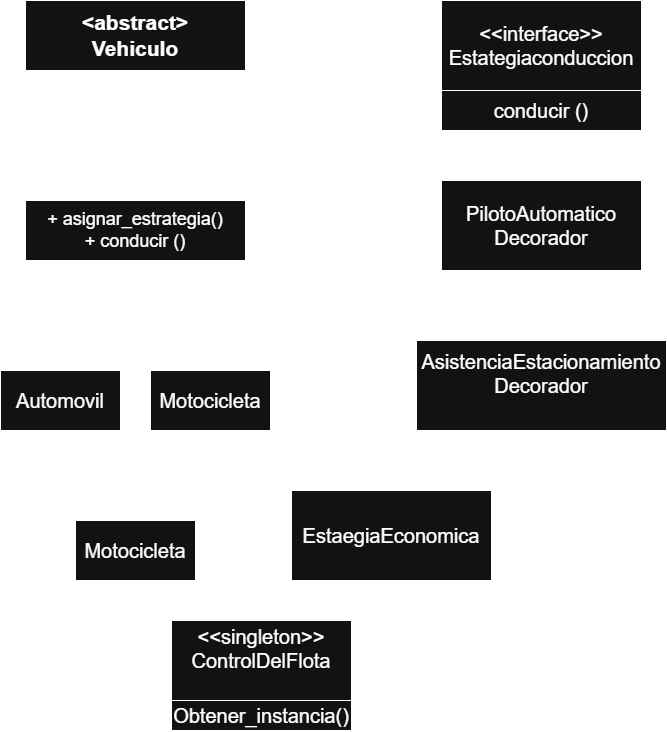

2. Diagrama de relaciones UML, mostrando:
o Composición entre ControlDeFlota y los vehículos.
o Asociación entre los vehículos y sus estrategias de conducción.
o Relación de los decoradores con los vehículos.

![Diagrama de relaciones UML.drawio.png](<attachment:Diagrama de relaciones UML.drawio.png>)
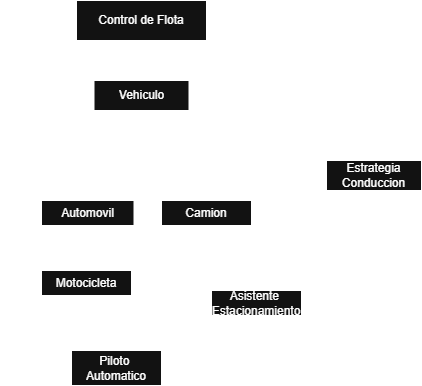

Reflexion

Empleé una clase abstracta para definir los comportamientos compartidos por todos los vehículos. Apliqué herencia para crear clases derivadas con características específicas y polimorfismo para que cada una implementara su propia lógica de aceleración y frenado. Con los patrones Strategy y Decorator, pude cambiar dinámicamente el modo de conducción y agregar nuevas funcionalidades sin modificar el código principal. Además, usé Singleton para asegurar que la gestión de la flota se realice mediante una única instancia